<a href="https://colab.research.google.com/github/Arriven/amga/blob/master/AMGA_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step

Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 50)                39250     
_________________________________________________________________
hidden_2 (Dense)             (None, 50)                2550      
_________________________________________________________________
hidden_3 (Dense)             (None, 50)                2550      
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1

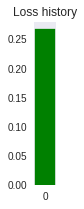



Operating on layer  hidden_1


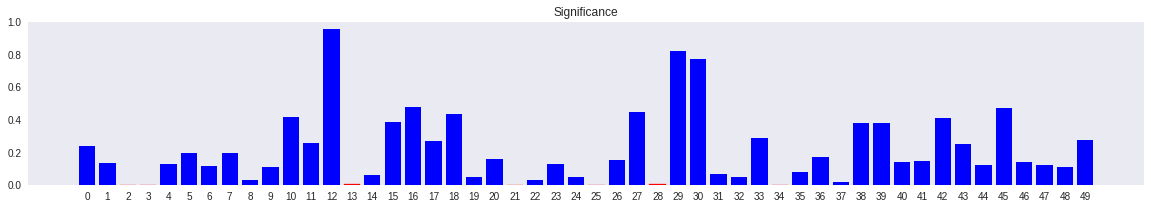

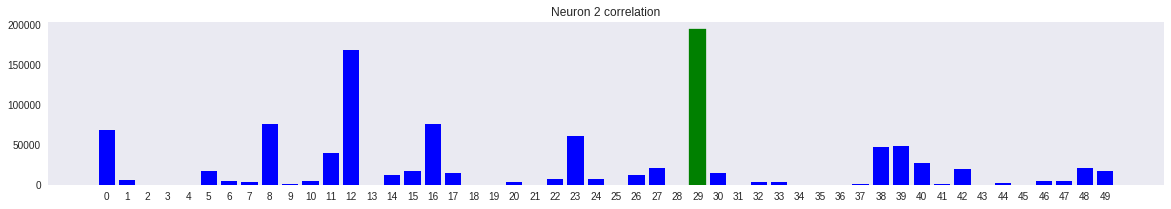

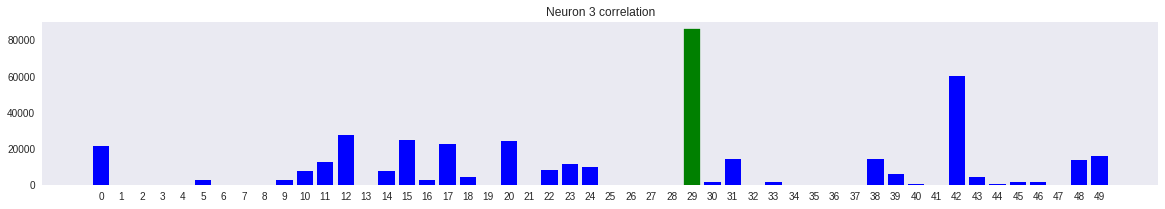

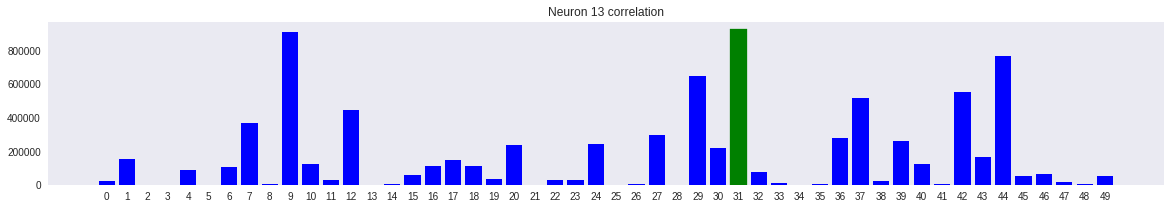

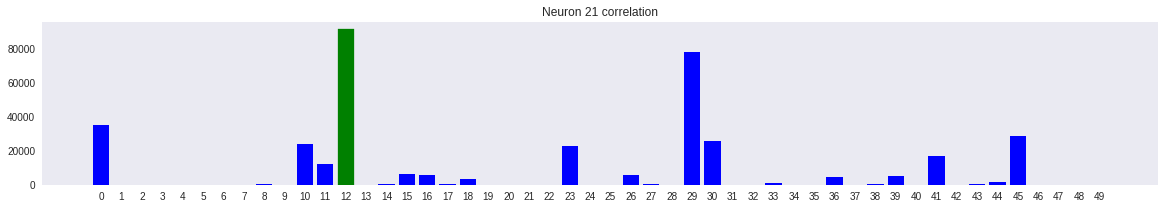

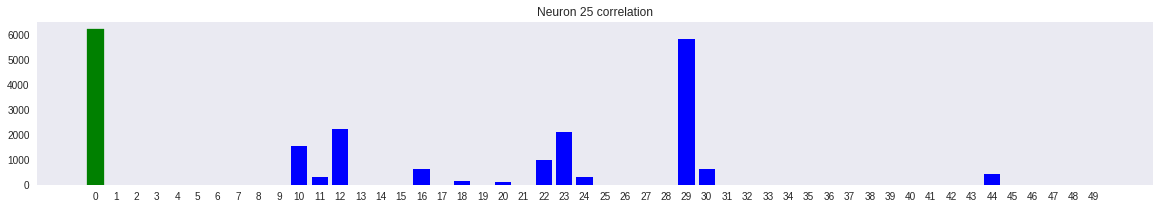

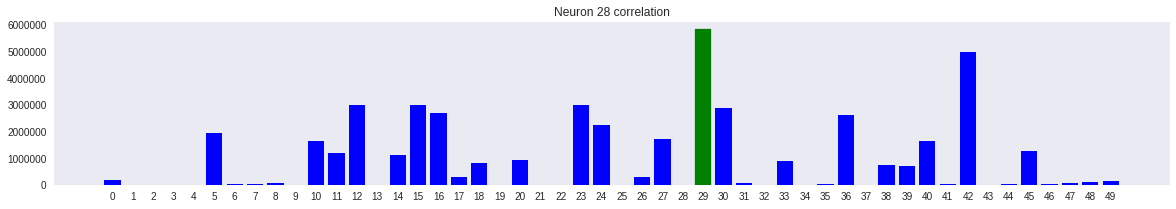

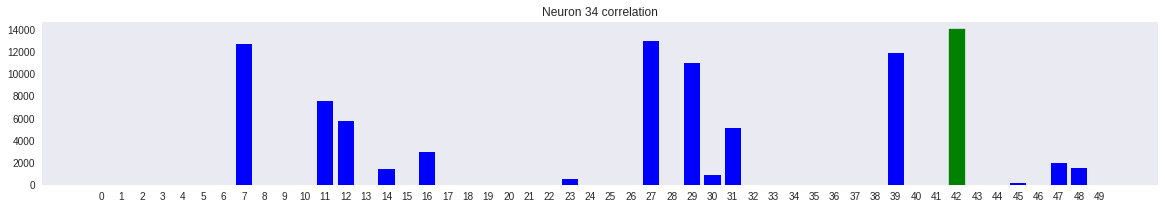

Deleting 7/50 channels from layer: hidden_1

Operating on layer  hidden_2


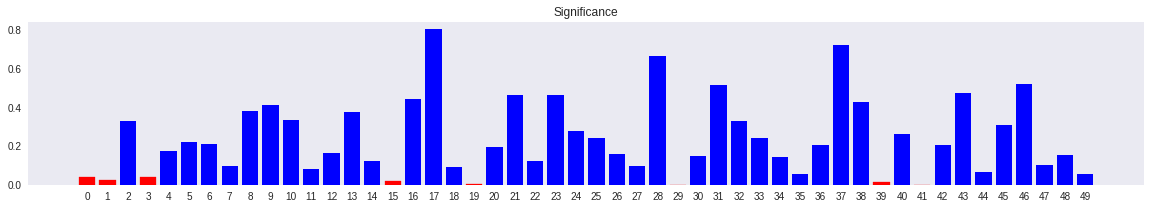

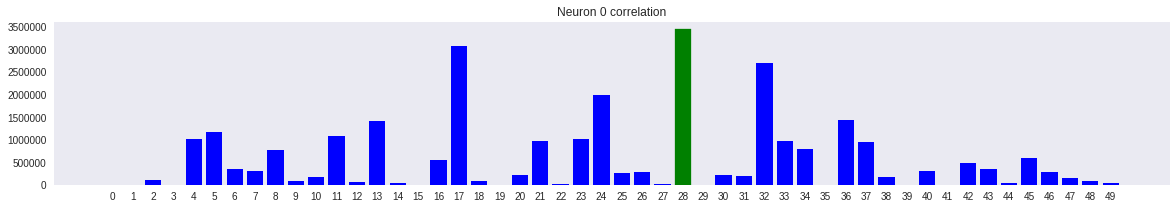

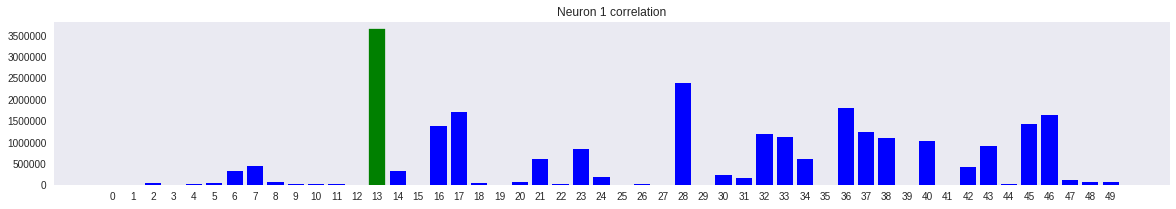

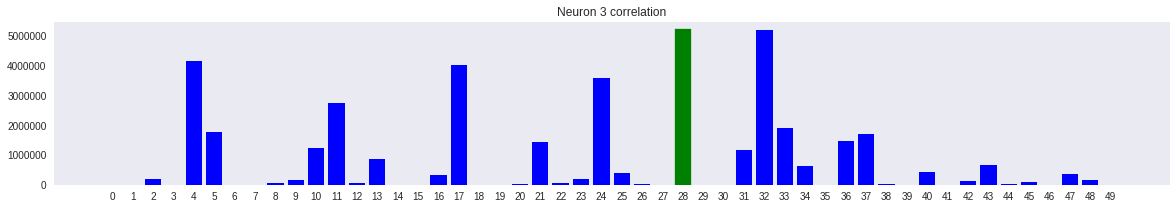

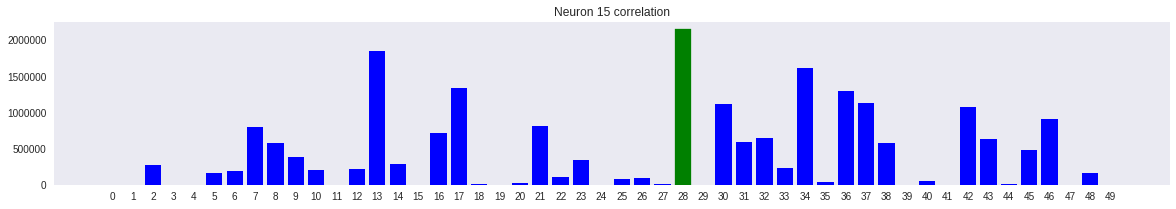

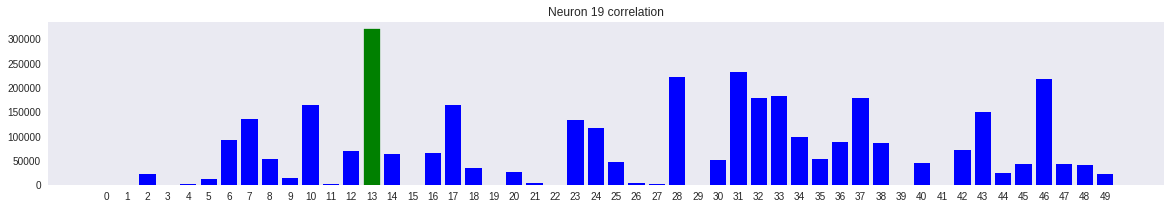

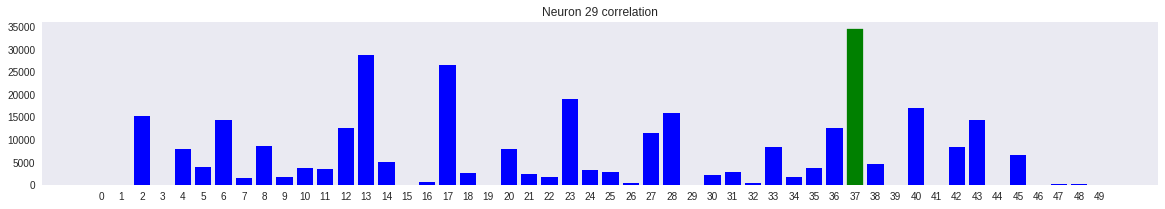

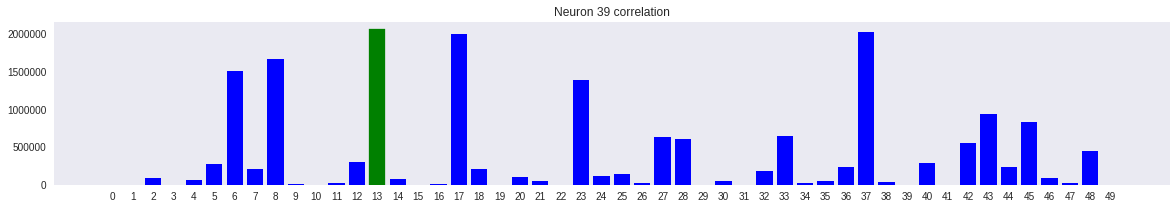

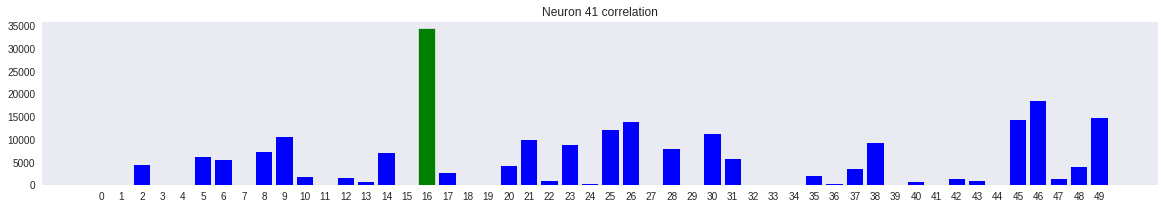

Deleting 8/50 channels from layer: hidden_2

Operating on layer  hidden_3


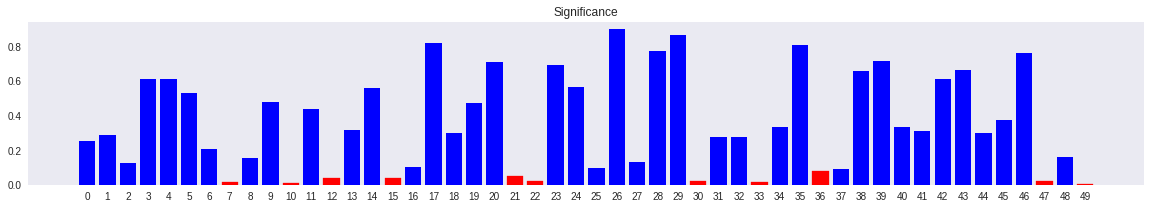

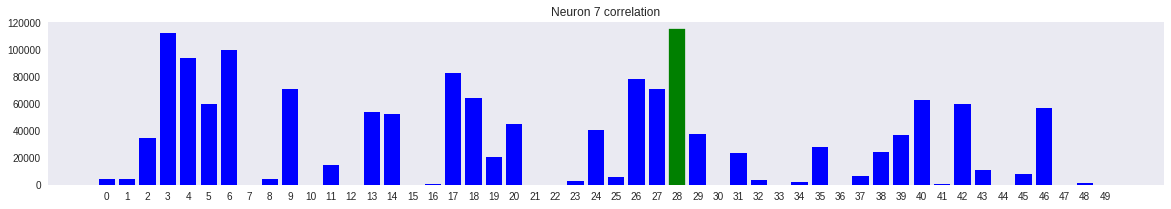

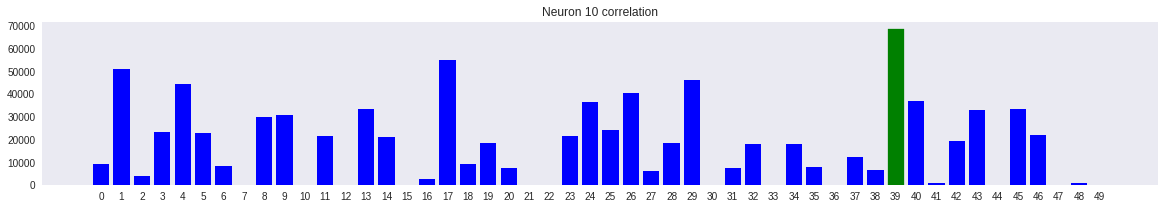

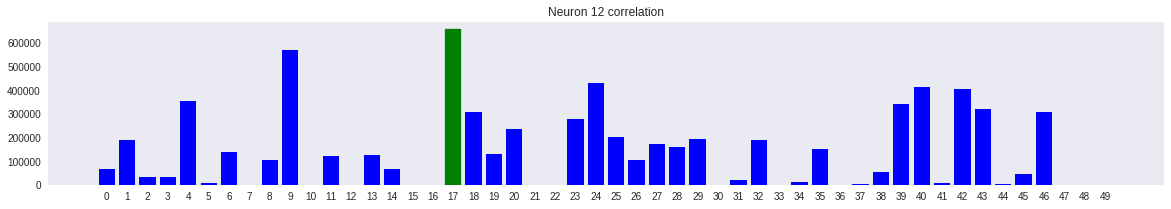

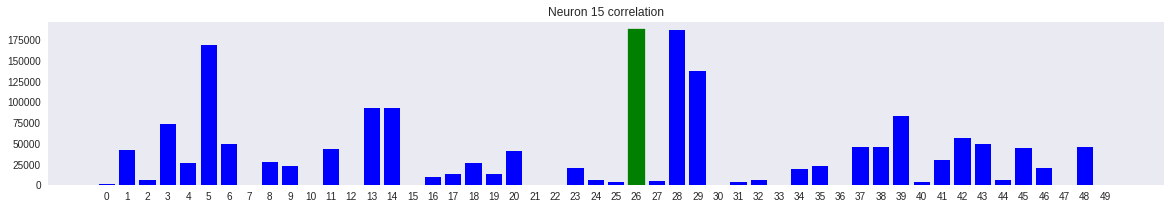

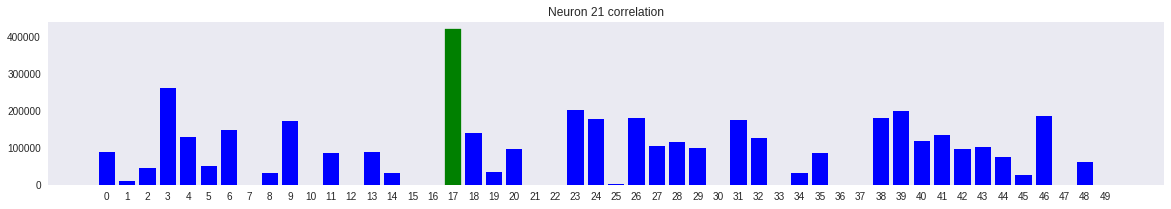

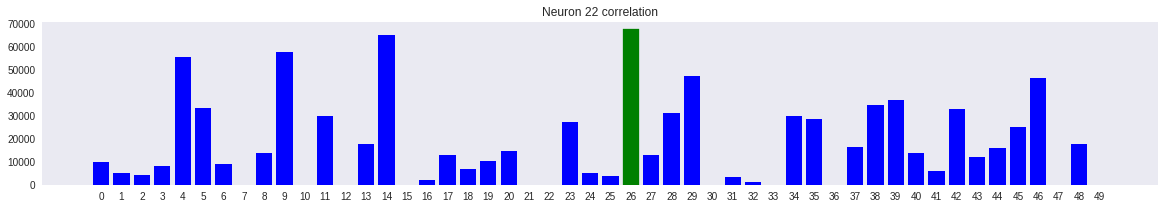

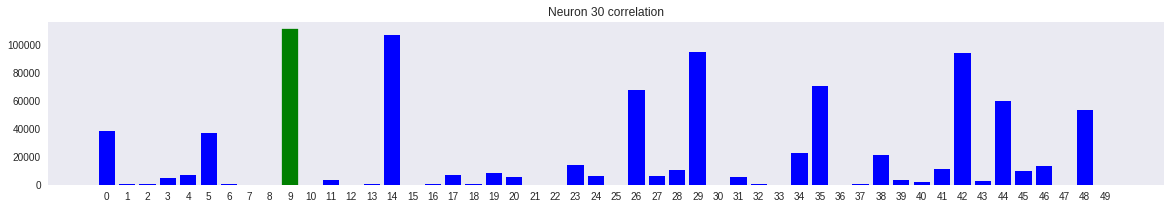

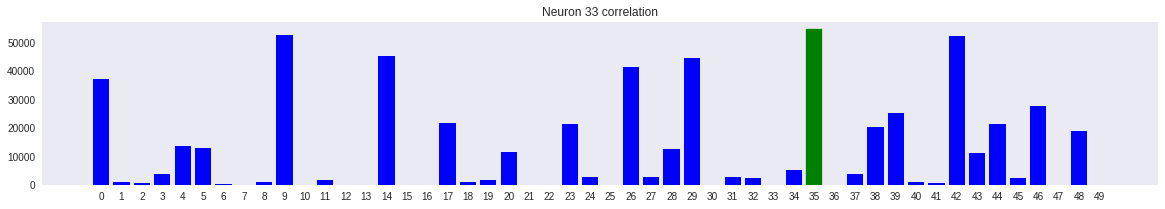

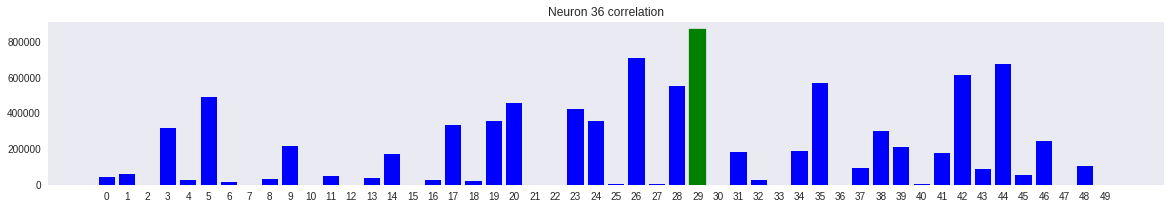

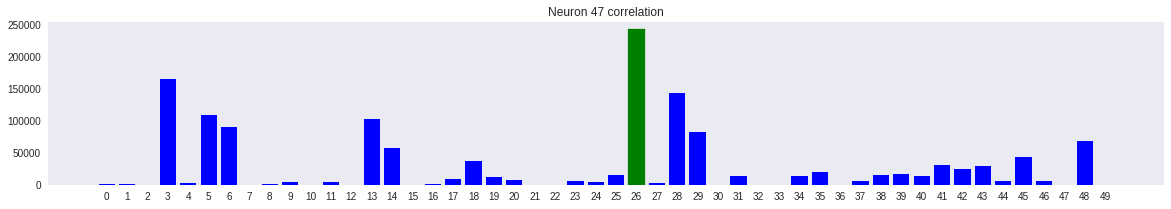

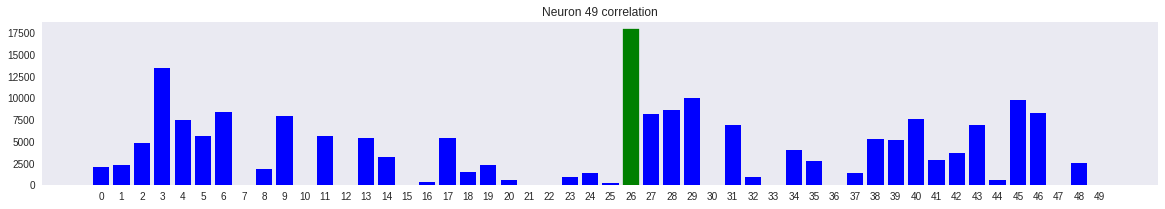

Deleting 11/50 channels from layer: hidden_3

Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 43)                33755     
_________________________________________________________________
hidden_2 (Dense)             (None, 42)                1848      
_________________________________________________________________
hidden_3 (Dense)             (None, 39)                1677      
_________________________________________________________________
output (Dense)               (None, 10)                400       
Total params: 37,680
Trainable params: 37,680
Non-trainable params: 0
____________

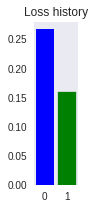



Operating on layer  hidden_1


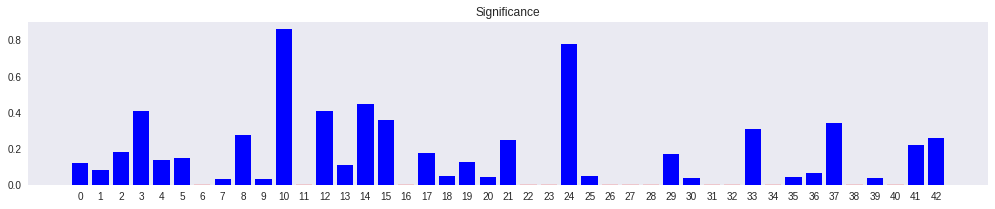


Neuron  6  was not activated at all, deleting


Neuron  11  was not activated at all, deleting


Neuron  16  was not activated at all, deleting



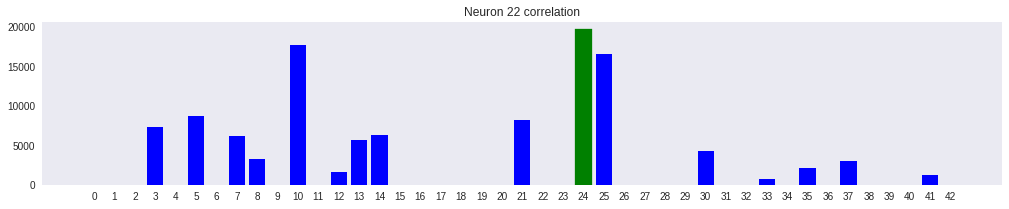


Neuron  23  was not activated at all, deleting



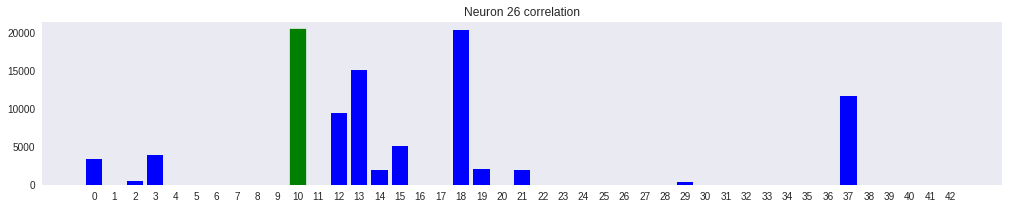

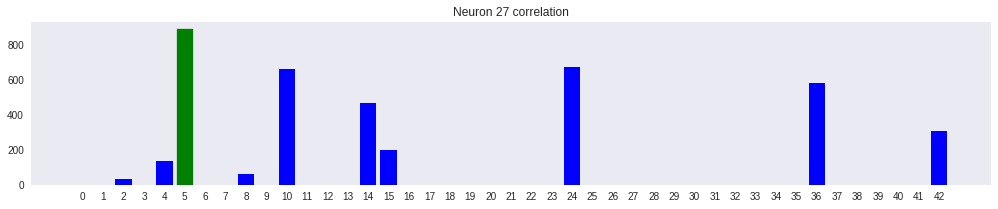

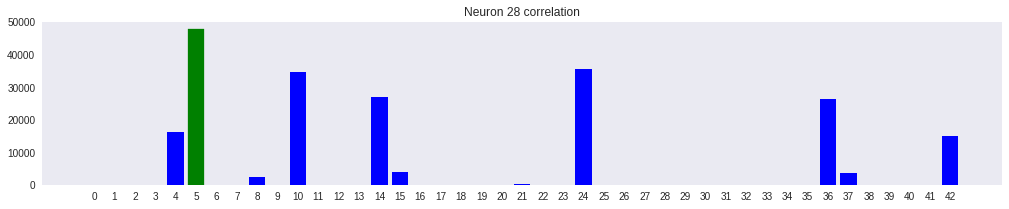


Neuron  31  was not activated at all, deleting



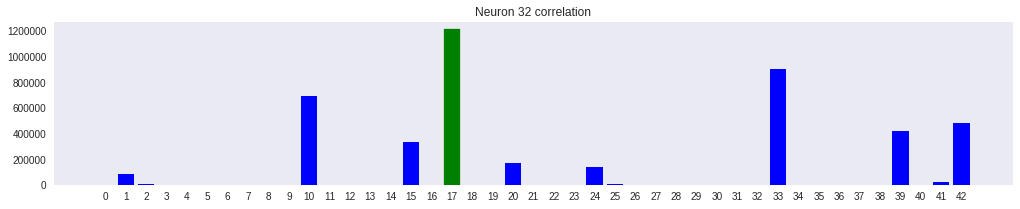


Neuron  34  was not activated at all, deleting



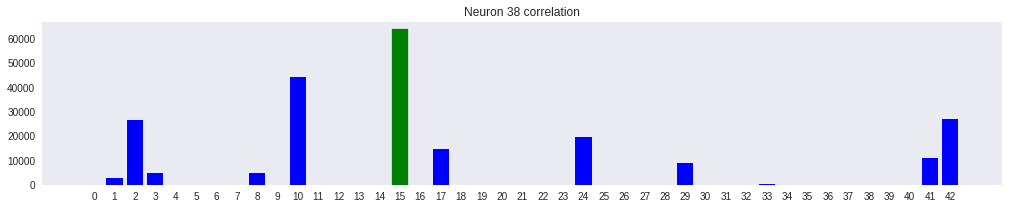


Neuron  40  was not activated at all, deleting

Deleting 13/43 channels from layer: hidden_1

Operating on layer  hidden_2


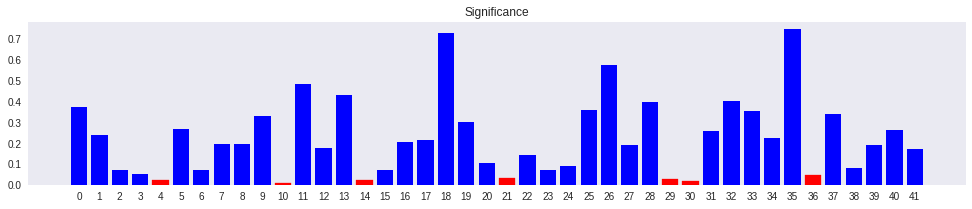

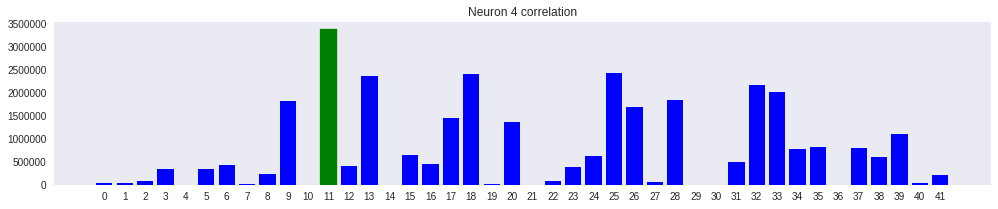

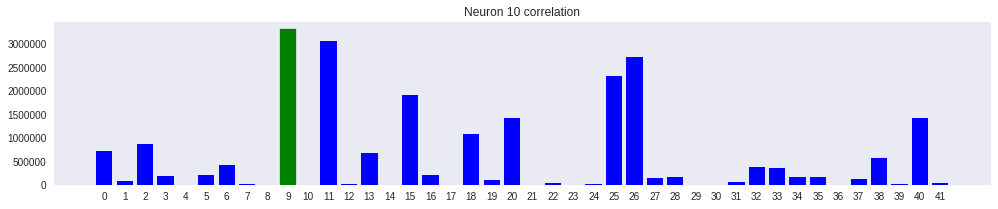

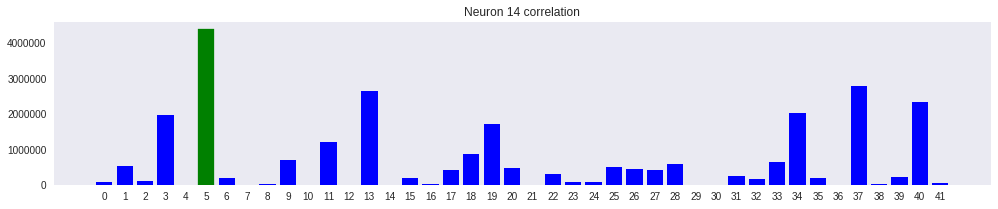

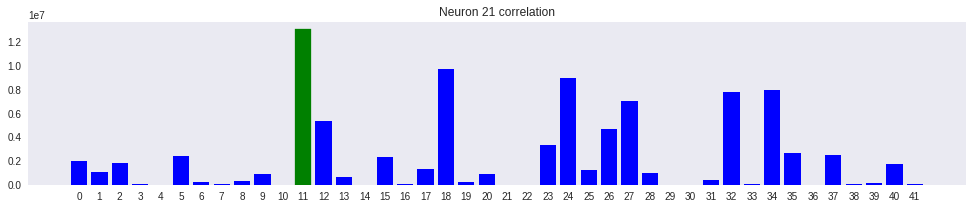

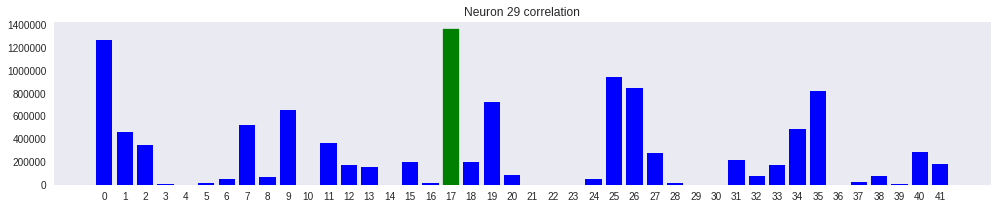

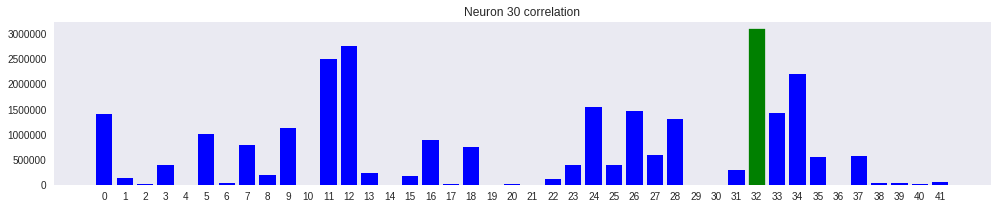

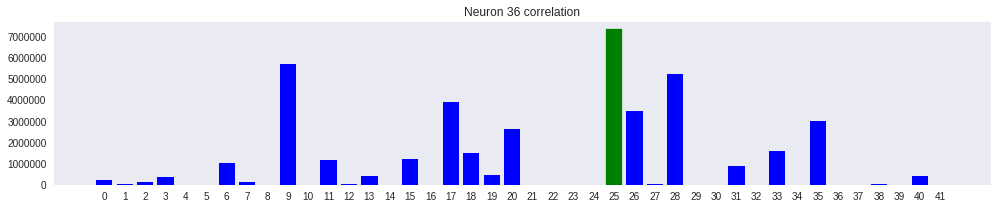

Deleting 7/42 channels from layer: hidden_2

Operating on layer  hidden_3


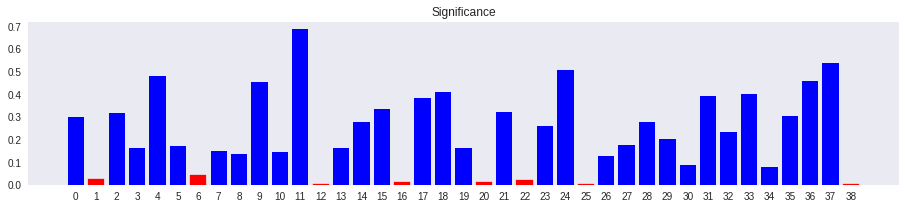

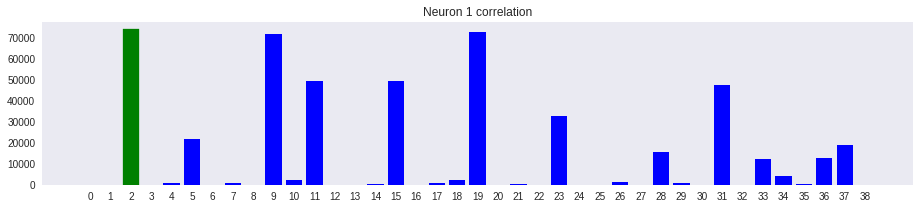

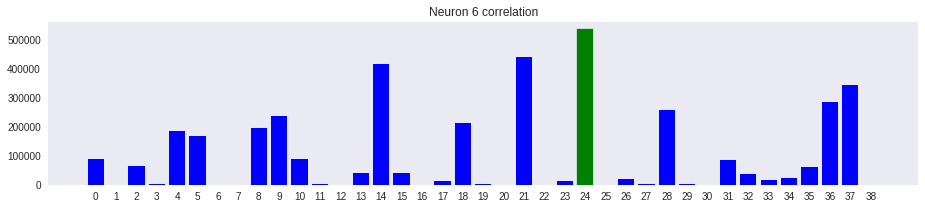

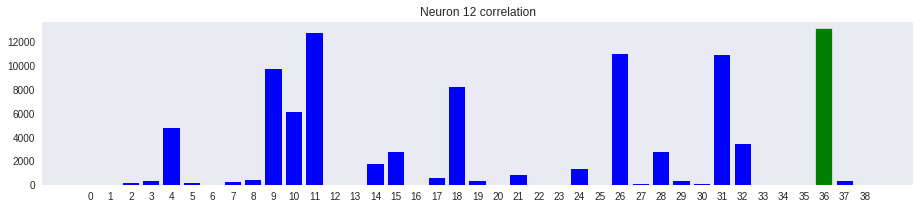

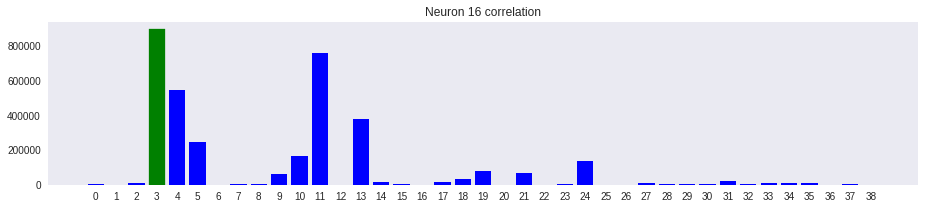

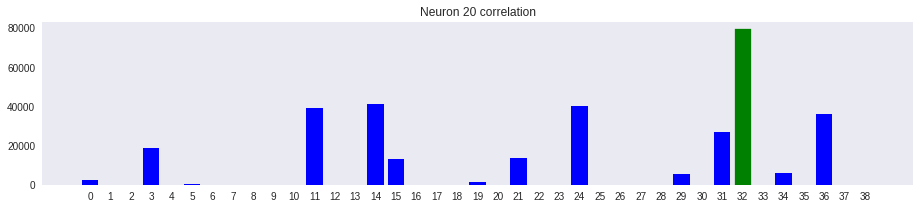

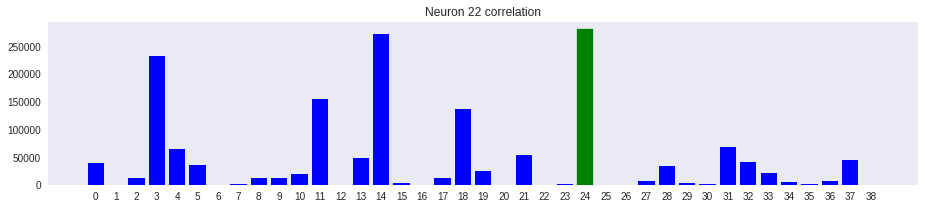

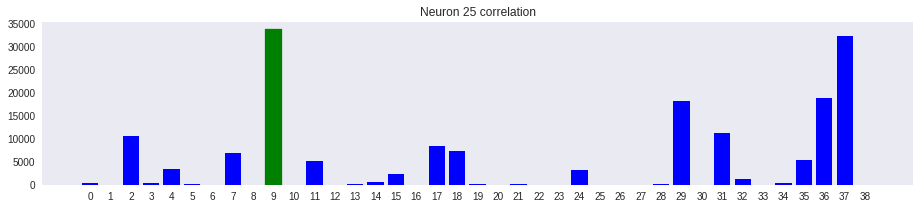

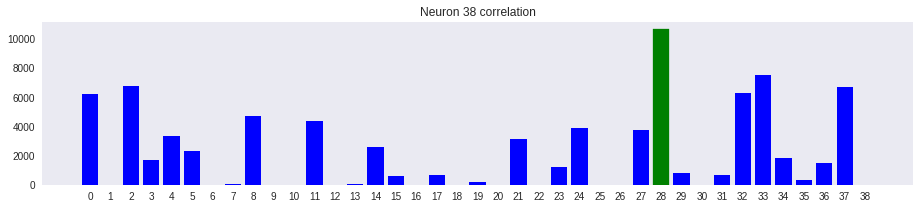

Deleting 8/39 channels from layer: hidden_3

Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                23550     
_________________________________________________________________
hidden_2 (Dense)             (None, 35)                1085      
_________________________________________________________________
hidden_3 (Dense)             (None, 31)                1116      
_________________________________________________________________
output (Dense)               (None, 10)                320       
Total params: 26,071
Trainable params: 26,071
Non-trainable params: 0
_____________

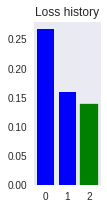



Operating on layer  hidden_1


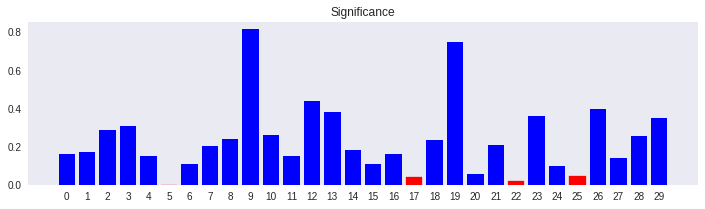


Neuron  5  was not activated at all, deleting



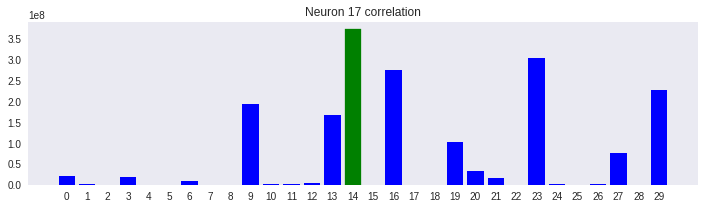

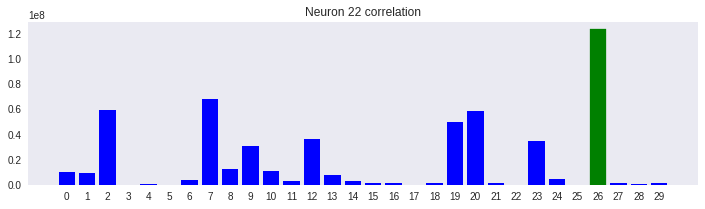

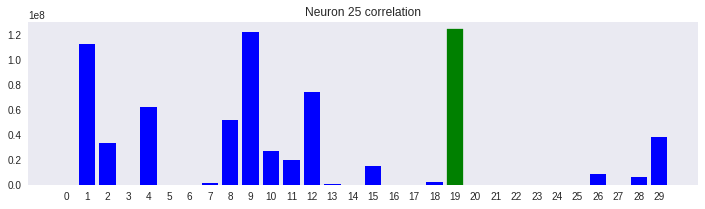

Deleting 4/30 channels from layer: hidden_1

Operating on layer  hidden_2


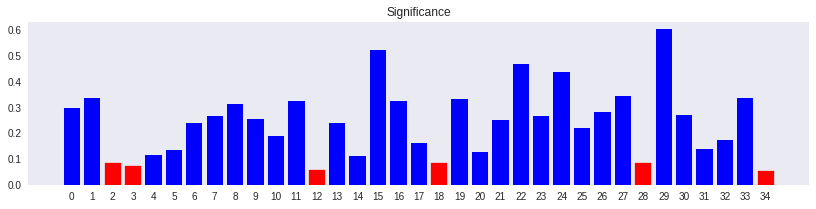

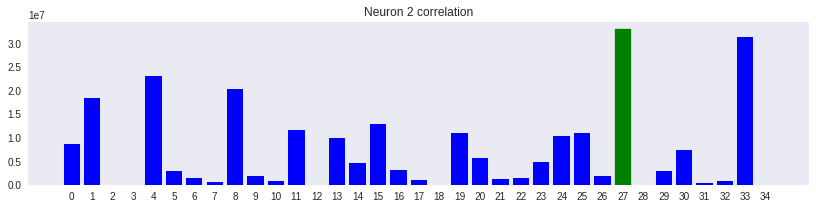

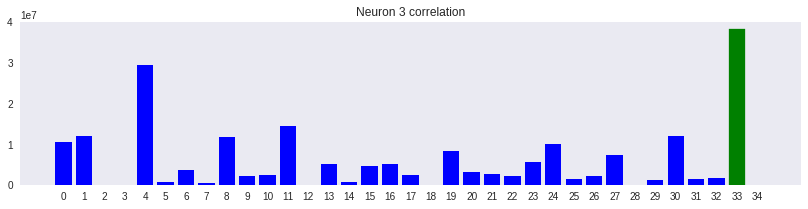

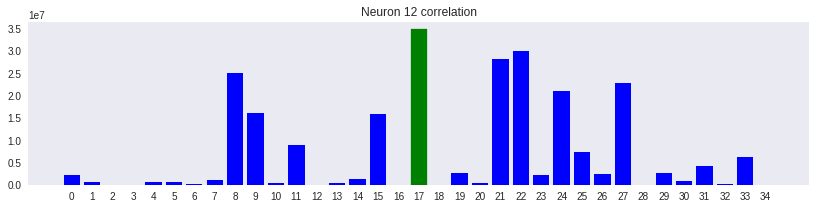

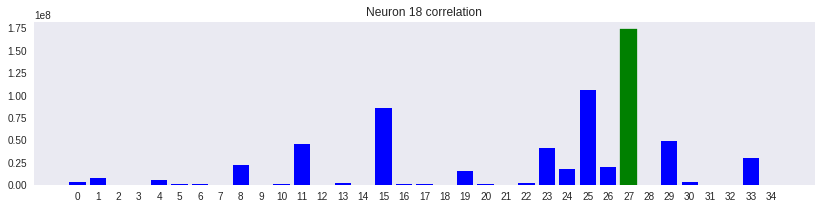

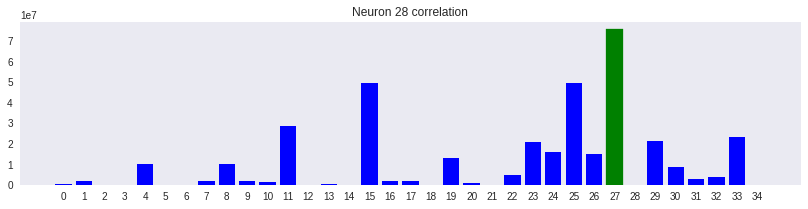

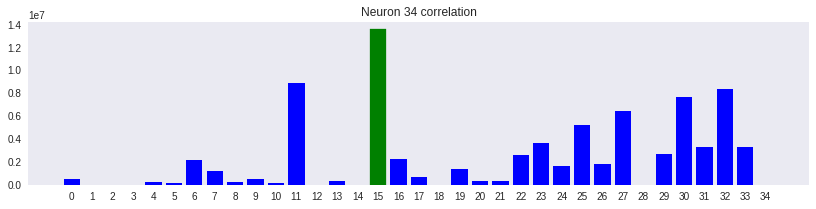

Deleting 6/35 channels from layer: hidden_2

Operating on layer  hidden_3


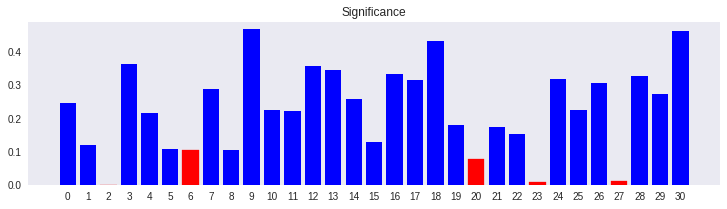

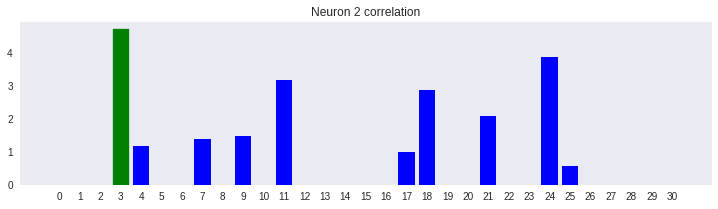

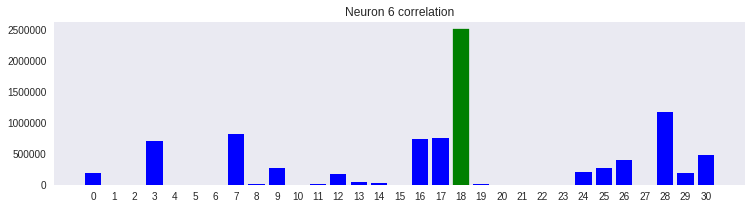

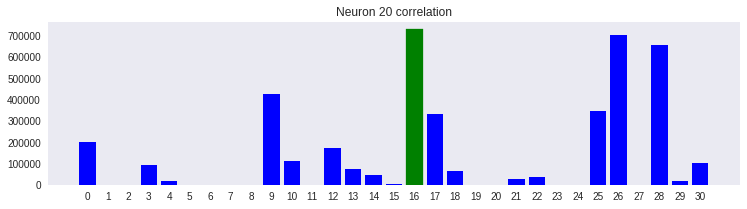

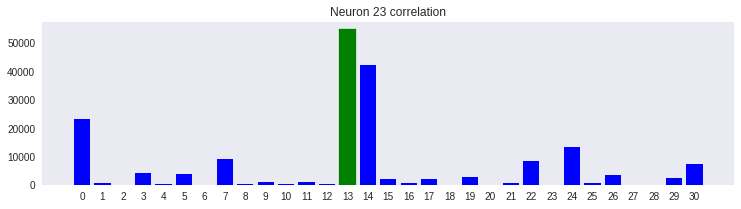

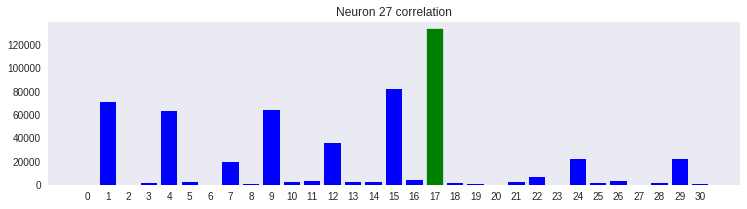

Deleting 5/31 channels from layer: hidden_3

Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 26)                20410     
_________________________________________________________________
hidden_2 (Dense)             (None, 29)                783       
_________________________________________________________________
hidden_3 (Dense)             (None, 26)                780       
_________________________________________________________________
output (Dense)               (None, 10)                270       
Total params: 22,243
Trainable params: 22,243
Non-trainable params: 0
_____________

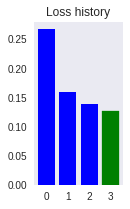



Operating on layer  hidden_1


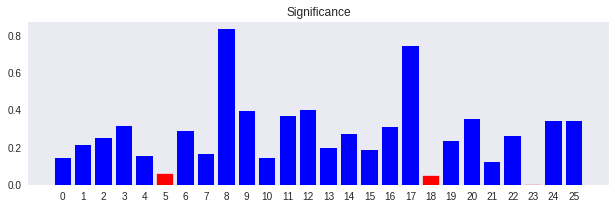

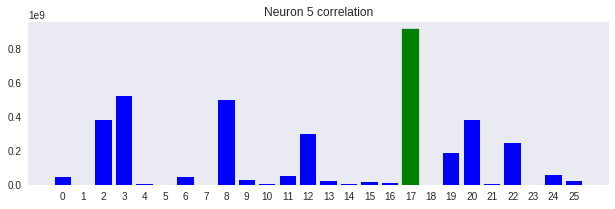

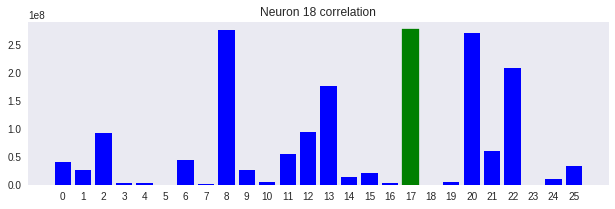


Neuron  23  was not activated at all, deleting

Deleting 3/26 channels from layer: hidden_1

Operating on layer  hidden_2


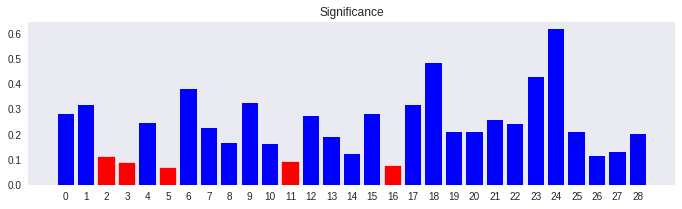

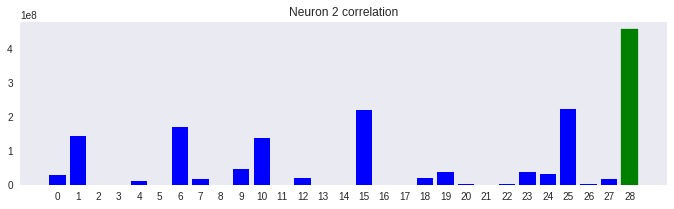

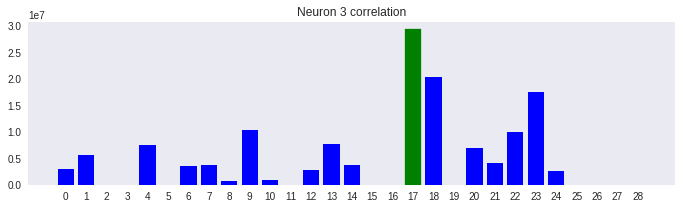

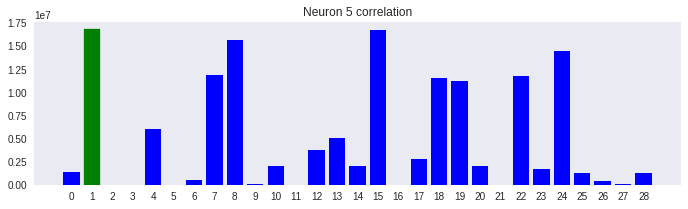

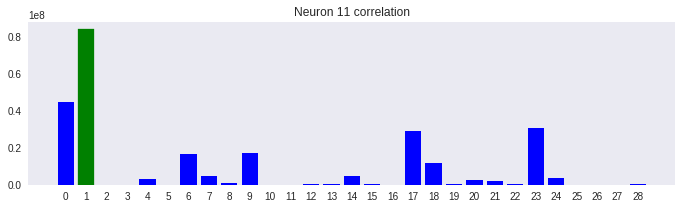

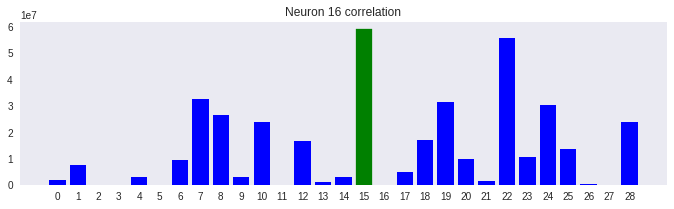

Deleting 5/29 channels from layer: hidden_2

Operating on layer  hidden_3


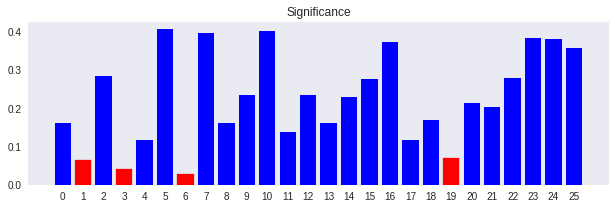

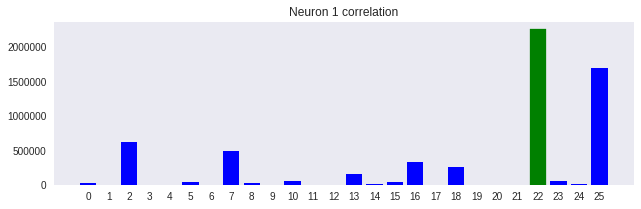

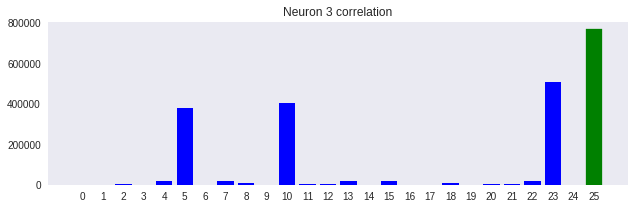

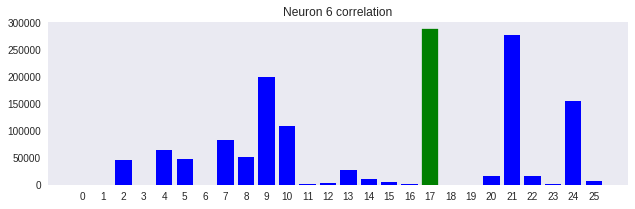

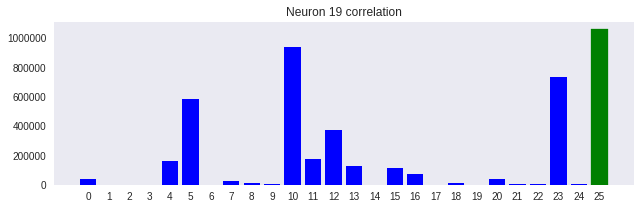

Deleting 4/26 channels from layer: hidden_3

Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 23)                18055     
_________________________________________________________________
hidden_2 (Dense)             (None, 24)                576       
_________________________________________________________________
hidden_3 (Dense)             (None, 22)                550       
_________________________________________________________________
output (Dense)               (None, 10)                230       
Total params: 19,411
Trainable params: 19,411
Non-trainable params: 0
_____________

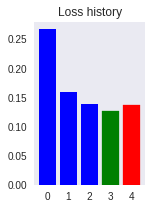



Reached stop point
Final model:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 26)                20410     
_________________________________________________________________
hidden_2 (Dense)             (None, 29)                783       
_________________________________________________________________
hidden_3 (Dense)             (None, 26)                780       
_________________________________________________________________
output (Dense)               (None, 10)                270       
Total params: 22,243
Trainable params: 22,243
Non-trainable params: 0
______________________________________

In [1]:
#comment this to run in a local mode, you'll need to install missing packages
!pip install kerassurgeon

from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.models import Model
from keras.models import clone_model
from keras import layers
from keras import callbacks
from keras import backend
#from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist

import numpy as np

from kerassurgeon import identify
from kerassurgeon import utils
from kerassurgeon.operations import delete_channels

import matplotlib.pyplot as plt


def show_loss_history(loss_array):
    plt.figure(figsize=(len(loss_array) / 2.5, 3))
    loss_plot = plt.bar(range(len(loss_array)), loss_array, color='blue')
    best_loss = np.argmin(loss_array)
    loss_plot[best_loss].set_color('green')
    if (loss_array[best_loss] != loss_array[-1]):
        loss_plot[-1].set_color('red')
    plt.xticks(range(len(loss_array)))
    plt.grid(False)
    plt.title('Loss history')
    plt.show()
  

#apoz - numpy array with significances of every neuron
#high_apoz_channels - array with indexes of channels identified for pruning
def show_significance(apoz, high_apoz_channels):
    plt.figure(figsize=(len(apoz) / 2.5, 3))
    significance_plot = plt.bar(range(len(apoz)), [1 - xi for xi in apoz], color='blue')
    for i in high_apoz_channels:
        significance_plot[i].set_color('red')
    plt.xticks(range(len(apoz)))
    plt.grid(False)
    plt.title('Significance')
    plt.show()
    
    
def show_corellation(corr, i):
    plt.figure(figsize=(len(corr) / 2.5, 3))
    significance_plot = plt.bar(range(len(corr)), corr, color='blue')
    significance_plot[np.argmax(corr)].set_color('green')
    plt.xticks(range(len(corr)))
    plt.grid(False)
    plt.title('Neuron {} correlation'.format(i))
    plt.show()


def get_apoz(model, layer, x_val, batch_size, node_indices=None):
    layer_node_indices = utils.find_nodes_in_model(model, layer)
    if not node_indices:
        node_indices = layer_node_indices

    data_format = getattr(layer, 'data_format', 'channels_last')
    # Perform the forward pass and get the activations of the layer.
    mean_calculator = utils.MeanCalculator(sum_axis=0)
    for node_index in node_indices:
        act_layer, act_index = utils.find_activation_layer(layer, node_index)
        # Get activations
        temp_model = Model(model.inputs,
                           act_layer.get_output_at(act_index))
        a = temp_model.predict(x_val)
        # Ensure that the channels axis is last
        if data_format == 'channels_first':
            a = np.swapaxes(a, 1, -1)
            print(a)
        # Flatten all except channels axis
        activations = np.reshape(a, [-1, a.shape[-1]])
        zeros = (activations == 0).astype(int)
        mean_calculator.add(zeros)

    return mean_calculator.calculate()
  

def get_corr(model, layer, high_apoz_channels, x_val, batch_size, node_indices=None):
    layer_node_indices = utils.find_nodes_in_model(model, layer)
    # If no nodes are specified, all of the layer's inbound nodes which are
    # in model are selected.
    if not node_indices:
        node_indices = layer_node_indices

    data_format = getattr(layer, 'data_format', 'channels_last')
    # Perform the forward pass and get the activations of the layer.
    for node_index in node_indices:
        act_layer, act_index = utils.find_activation_layer(layer, node_index)
        # Get activations
        temp_model = Model(model.inputs,
                           act_layer.get_output_at(act_index))
        a = temp_model.predict(x_val)
        corellation = np.zeros((a.shape[1], a.shape[1]))
        predictions = a.transpose()
        for i in range(a.shape[1]):
            if i in high_apoz_channels:
                for j in range(a.shape[1]):
                    if i != j and j not in high_apoz_channels:
                        corellation[i][j] = np.correlate(predictions[i], predictions[j])
        return corellation
      
        
def merge_channels(model, layer, destination, source):
    weights = layer.get_weights()
    inputs = weights[0]
    output_weights = weights[1]
    output_weights[destination] = output_weights[destination] + output_weights[source]
    for input_weights in inputs:
        input_weights[destination] = (input_weights[destination] + input_weights[source]) / 2
    layer.set_weights(weights)
    
def copy_model_params(model, model_copy):  
    model_copy.compile(optimizer=model.optimizer,
                  loss=model.loss,
                  metrics=model.metrics)
    
    return model_copy
    
def clone_model_full(model):
    model_copy = clone_model(model)
    model_copy = copy_model_params(model, model_copy)
    model_copy.set_weights(model.get_weights())
    
    return model_copy
  
    
def train_model(model, train_images, train_labels, val_images, val_labels):
    early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0,
                                             patience=7,
                                             verbose=2,
                                             mode='auto',
                                             restore_best_weights=True)
    
    new_model = clone_model_full(model)
    results = new_model.fit(train_images,
                            train_labels,
                            epochs=5, #reduce the number for demo
                            batch_size=128,
                            verbose=2,
                            validation_data=(val_images, val_labels),
                            callbacks=[early_stopping])
    return new_model
  
  
def merge_model(model, layer_names, train_images, train_labels, method="both", cutoff_std=1, cutoff_absolute=0.99):
    model_copy = clone_model_full(model)
        
    for layer_name in layer_names:
        print()
        print('===================================')
        print('Operating on layer ', layer_name)
        print('===================================')
        
        #Use original model to determine significance and corellation since merging of neurons can lead to their change
        layer = model.get_layer(name=layer_name)
        apoz = get_apoz(model, layer, train_images, 128)
        high_apoz_channels = identify.high_apoz(apoz, method=method, cutoff_std=cutoff_std, cutoff_absolute=cutoff_absolute)
        corr = get_corr(model, layer, high_apoz_channels, train_images, 128)

        show_significance(apoz, high_apoz_channels)

        for i in high_apoz_channels:
            destination = np.argmax(corr[i])
            if corr[i][destination] > 0:
                show_corellation(corr[i], i)
                merge_channels(model_copy, model_copy.get_layer(name=layer_name), np.argmax(corr[i]), i)
            else:
                print('\nNeuron ', i, ' was not activated at all, deleting\n')
        
        new_model = delete_channels(model_copy, model_copy.get_layer(name=layer_name), high_apoz_channels)
        
        model_copy = copy_model_params(model_copy, new_model)
        
    return model_copy

  
def main():
    training_verbosity = 2
    
    
    # Download data if needed and import.
    (train_images, train_labels), (val_images, val_labels) = mnist.load_data()

    # Create model
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(50, activation='relu', name='hidden_1'))
    model.add(Dense(50, activation='relu', name='hidden_2'))
    model.add(Dense(50, activation='relu', name='hidden_3'))
    model.add(Dense(10, activation='softmax', name='output'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    layer_names = ['hidden_1','hidden_2','hidden_3']

    print()
    print('===================================')
    print('Model summary')
    print('===================================')
    model.summary()
    print()

    # Train model on MNIST
    model = train_model(model, train_images, train_labels, val_images, val_labels)

    loss = model.evaluate(val_images, val_labels, batch_size=128, verbose=2)

    loss_array = []
    print()
    print('===================================')
    print('\nOriginal model loss:', loss, '\n')
    print('===================================')
    loss_array.append(loss[0])
    show_loss_history(loss_array)
    print()
    test_loss = loss
    while True:
        merged_model = merge_model(model, layer_names, train_images, train_labels)

        print()
        print('===================================')
        print('Model summary')
        print('===================================')
        merged_model.summary()
        print()

        merged_model = train_model(merged_model, train_images, train_labels, val_images, val_labels)

        loss = merged_model.evaluate(val_images,
                              val_labels,
                              batch_size=128,
                              verbose=2)

        print()
        print('===================================')
        print('\n', 'Model loss after retraining: ', loss, '\n')
        print('===================================')
        loss_array.append(loss[0])
        show_loss_history(loss_array)
        print()

        if loss < test_loss:
            model = merged_model
            test_loss = loss
        else:
            print()
            print('===================================')
            print('Reached stop point\nFinal model:')
            print('===================================')
            model.summary()
            print()
            break


main()